In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [12]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred = np.random.choice(['virginica', 'setosa', 'versicolor'],
                          replace=True, size=y_test.shape[0])

accuracy_score(y_test, y_pred)

0.34210526315789475

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [39]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [59]:
df = sns.load_dataset('titanic')
df = df[~df['age'].isnull()]
print(df.shape)
df.head()

(714, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
X = df[['age', 'fare']].values
y = df['survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(535, 2)
(179, 2)
(535,)
(179,)


In [63]:
y_pred = np.random.choice([0, 1], replace=True, size=y_test.shape[0])
accuracy_score(y_test, y_pred)

0.48044692737430167

In [85]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.664804469273743

In [86]:
df[['age', 'fare']].isnull().sum()

age     0
fare    0
dtype: int64

In [107]:
df = sns.load_dataset('tips')
df['dinner'] = (df['time'] == 'Dinner').astype(int)
print(df.shape)
df.head()

(244, 8)


,total_bill,tip,sex,smoker,day,time,size,dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [108]:
X = df[['total_bill', 'size', 'dinner']].values
y = df['tip'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
y_pred = np.mean(y_train) * np.ones(y_test.shape[0])
mean_squared_error(y_test, y_pred)

1.8323142285526592

In [111]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
knn = KNeighborsRegressor(n_neighbors=51)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mean_squared_error(y_test, y_pred)

0.9912903359993949

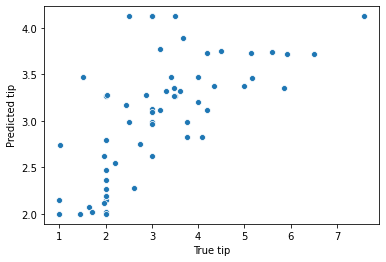

In [106]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True tip')
plt.ylabel('Predicted tip')
plt.show()